In [62]:
#Reading data
import pandas as pd


#Fixings warnings
import warnings 
warnings.filterwarnings('ignore')


#For mathematical operations
import numpy as np


#Visualisation
import seaborn as sns 
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.figure_factory as ff


#Data spliting
from sklearn.model_selection import train_test_split

In [63]:
sleep_data=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

#head() for display the first 5 rows  
sleep_data.head().style.set_properties(**{'background-color': '#4A235A',
                                          'color': '#E2EEF3'}) #for colored output

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.100000,6,42,6,Overweight,126/83,77,4200,nan
1,2,Male,28,Doctor,6.200000,6,60,8,Normal,125/80,75,10000,nan
2,3,Male,28,Doctor,6.200000,6,60,8,Normal,125/80,75,10000,nan
3,4,Male,28,Sales Representative,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [64]:
shape = colored(sleep_data.shape, "magenta",None, attrs=["blink"])
print('The dimention of data is :',shape)

The dimention of data is : (374, 13)


In [65]:
sleep_data.info() # for empty and type of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [66]:
#for statistical info
sleep_data.describe().style.background_gradient(cmap='BuPu') #for colored output

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [67]:
#for statistical info including string values
sleep_data.describe(include='O').style.set_properties(**{'background-color': '#4A235A',
                                                      'color': '#E2EEF3'})  

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


In [68]:
columns_name=colored(sleep_data.columns, 'magenta',None, attrs=["blink"]) #for show names of columns
print(columns_name)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [69]:
#for colored text output ( Text ,Text colors ,Text highlights , Attributes)
number_of_values=colored(sleep_data.nunique(), "magenta",None, attrs=["blink"])
                        
print(number_of_values) #for number of values of columns

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


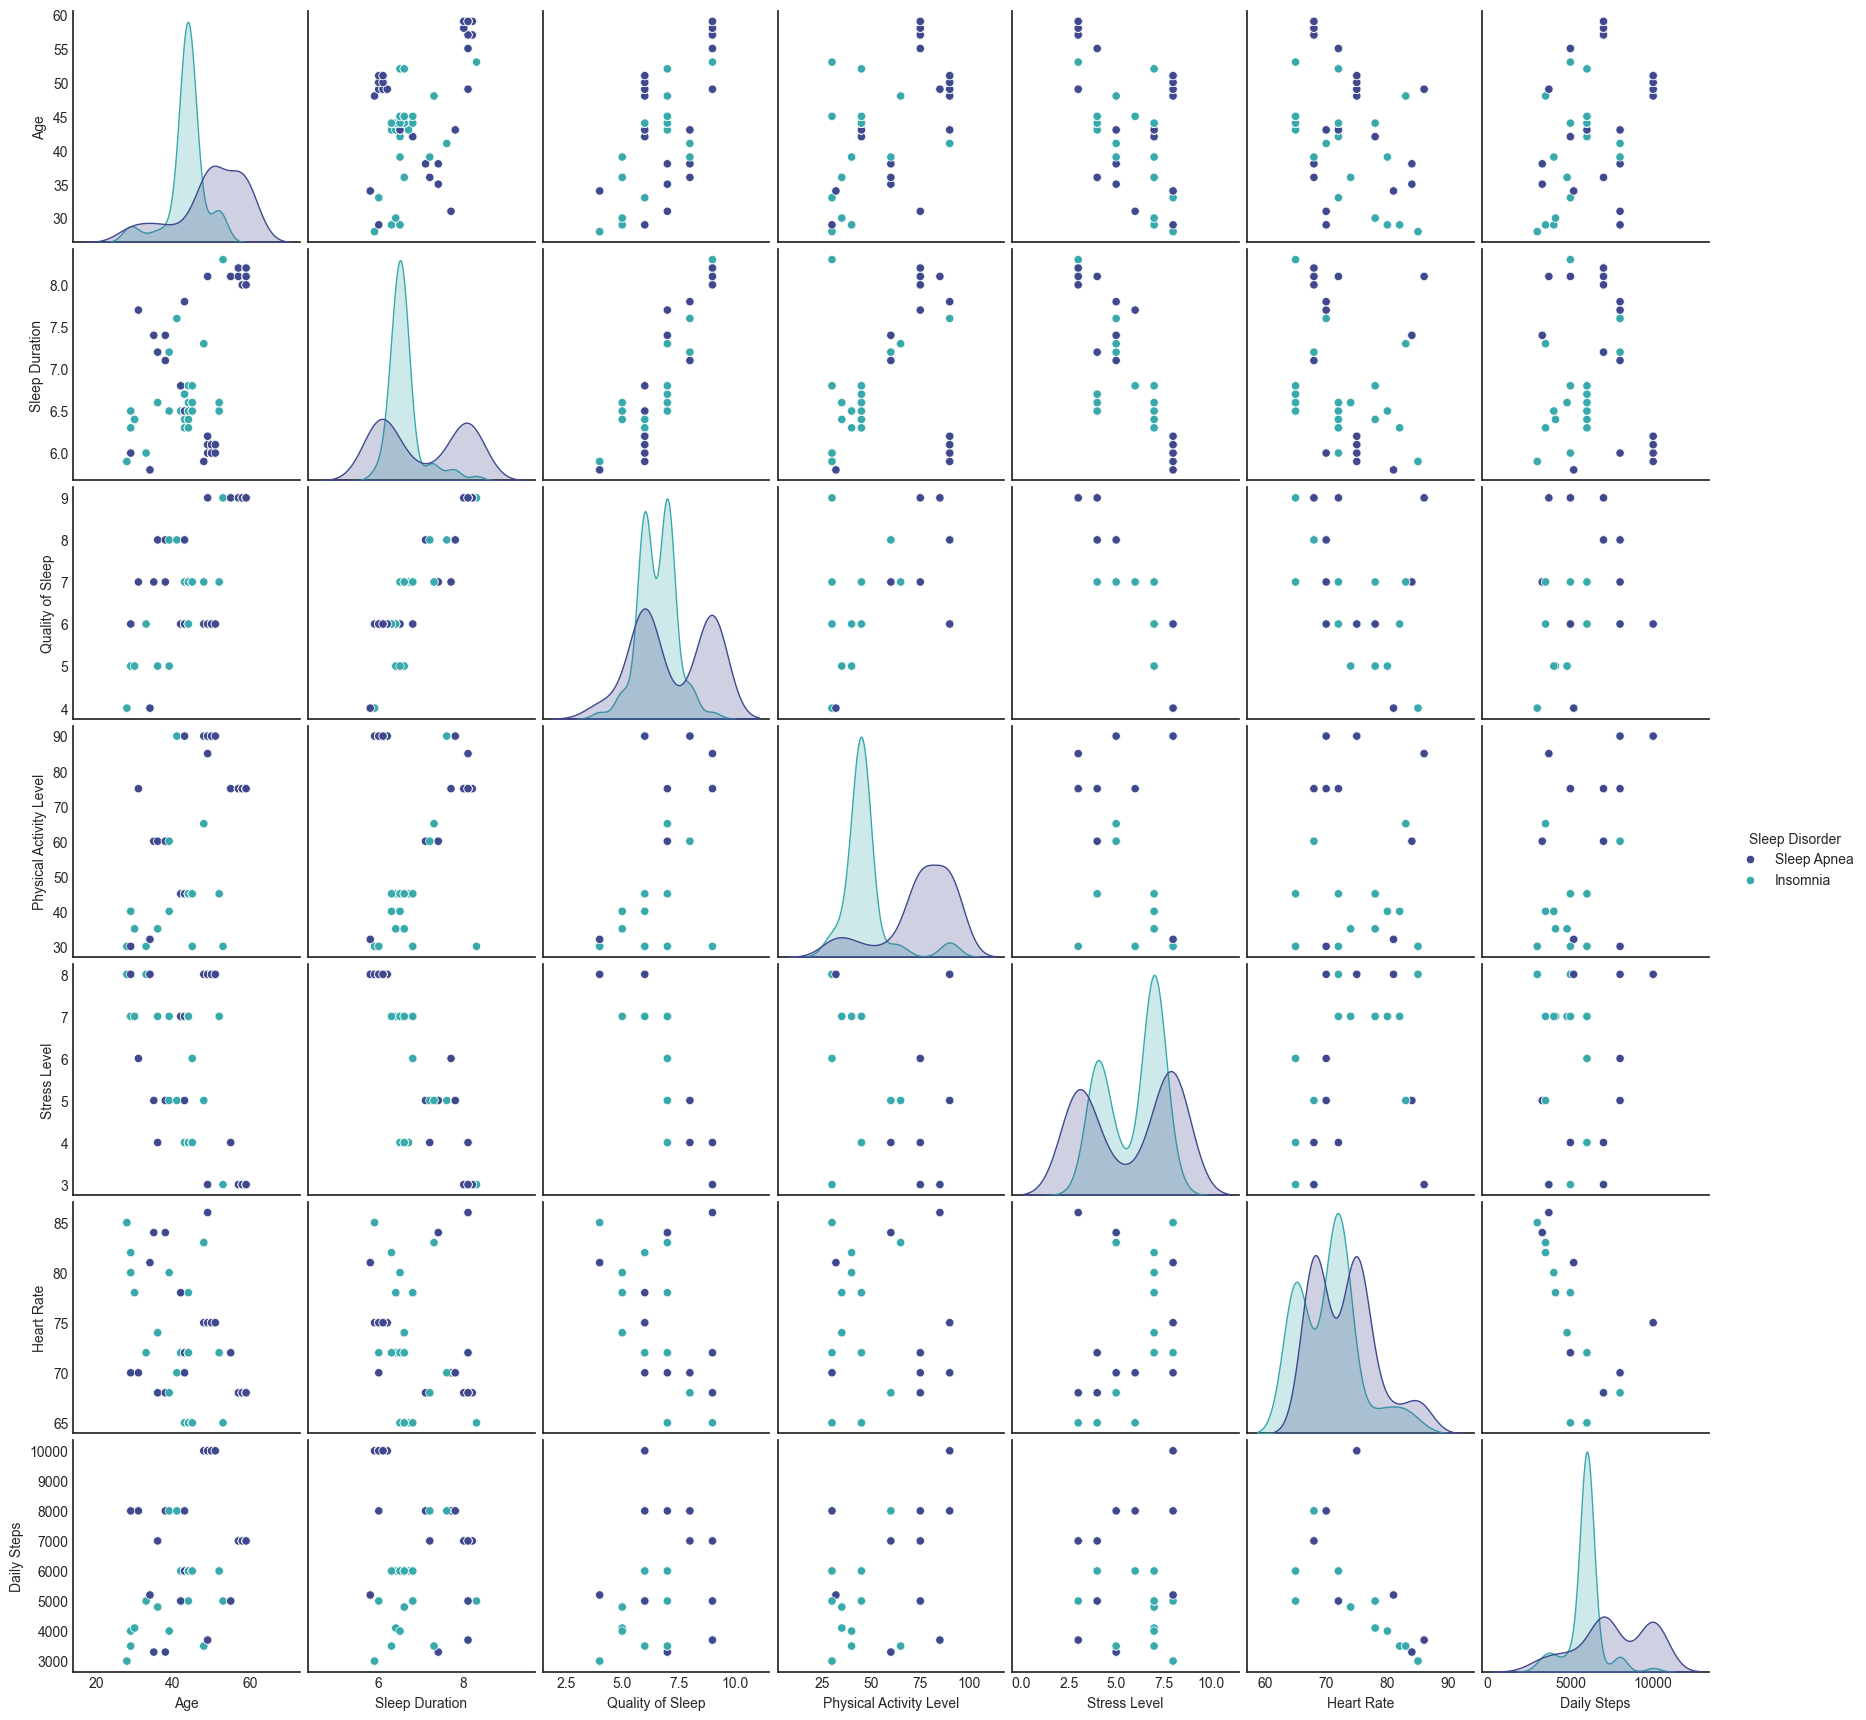

In [70]:
plt.style.use('seaborn-v0_8-white')
sns.pairplot(data=sleep_data.drop('Person ID',axis=1),hue='Sleep Disorder',palette='mako')
plt.legend()
plt.show()

In [71]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [72]:
classes=colored(sleep_data['Sleep Disorder'].unique(), "magenta",None, attrs=["blink"])
print('The outputs from the classification are :',classes)

The outputs from the classification are : [nan 'Sleep Apnea' 'Insomnia']


In [73]:
sleep_data['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [111]:
import pandas as pd
import plotly.express as px

# Veriyi okuma
sleep_data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# 'None' değerleri 'Unknown' olarak değiştirme
sleep_data['Sleep Disorder'].fillna('Unknown', inplace=True)

# Histogram oluşturma, 'None' değerlerini filtreleme
fig = px.histogram(sleep_data[sleep_data['Sleep Disorder'] != 'None'],
                   x='Sleep Disorder', 
                   barmode="group",
                   color='Sleep Disorder',
                   color_discrete_sequence=['white', '#4A235A', '#C39BD3'],
                   text_auto=True)

# Layout ayarları
fig.update_layout(title='<b>Distribution of persons have sleep disorder or not</b>..',
                  title_font={'size': 25},
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0',
                  showlegend=True)

# Eksen ayarları
fig.update_yaxes(showgrid=False)

# Çıktıyı gösterme
fig.show()


In [75]:
Gender=colored(sleep_data['Gender'].unique(), "magenta",None, attrs=["blink"])
print('The values of Sex column are :',Gender)

The values of Sex column are : ['Male' 'Female']


In [76]:
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
None            Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

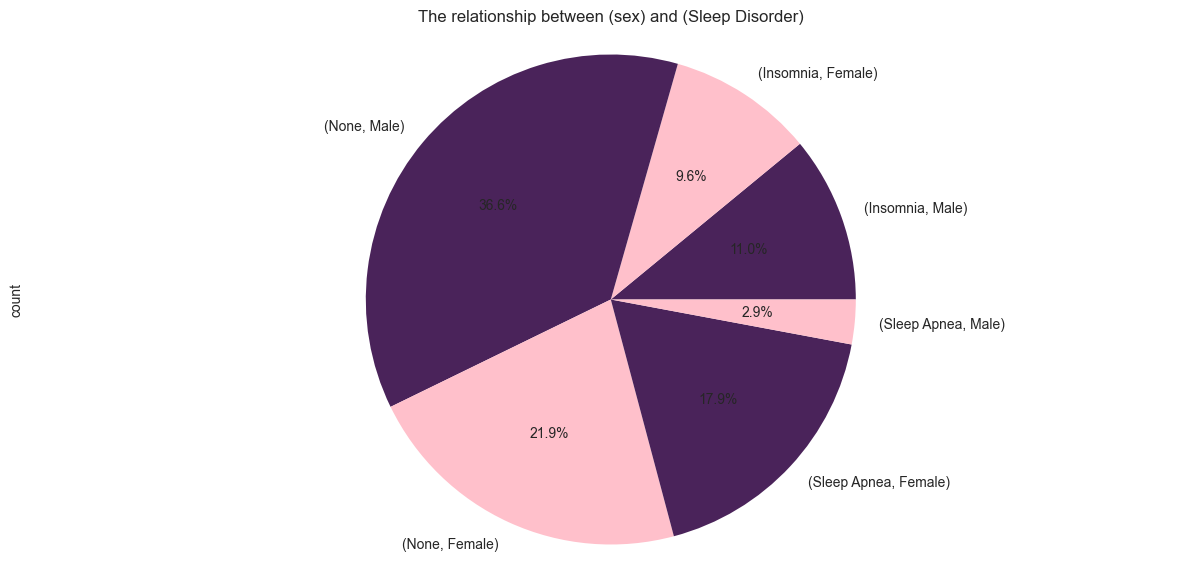

In [79]:
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(15,7),
                                                                       colors=['#4A235A','pink','#4A235A','pink','#4A235A','pink'])
plt.title('The relationship between (sex) and (Sleep Disorder)')
plt.axis('equal')
plt.show()

In [80]:
import pandas as pd
import plotly.express as px

# Veriyi okuma
sleep_data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Jobs sütununu ekleyerek yeni bir veri çerçevesi oluşturma
new_data = sleep_data.assign(Jobs='Jobs')

# 'None' değerleri 'Unknown' olarak değiştirme
new_data['Sleep Disorder'].fillna('Unknown', inplace=True)

# 'Unknown' değerlerini 'None' olarak değiştirme
new_data['Sleep Disorder'].replace('Unknown', 'None', inplace=True)

# Treemap oluşturma
fig = px.treemap(new_data, 
                 path=['Jobs', 'Sleep Disorder', 'Occupation'],
                 color='Sleep Disorder',
                 color_discrete_sequence=['#EBDEF0', '#C39BD3', '#4A235A'])

# Layout ayarları
fig.update_layout(title='<b>The effect of job on sleep</b>..',
                  title_font={'size': 20})

# Çıktıyı gösterme
fig.show()


In [81]:
import pandas as pd
import plotly.express as px

# Veriyi okuma
sleep_data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# 'None' değerlerini içeren bir kopya oluşturma
sleep_data_with_none = sleep_data.copy()
sleep_data_with_none['Sleep Disorder'].fillna('None', inplace=True)

# ECDF oluşturma
fig = px.ecdf(sleep_data_with_none, x='Age', color='Sleep Disorder',
              color_discrete_sequence=['white', '#4A235A', '#C39BD3'],
              category_orders={'Sleep Disorder': ['None', 'Insomnia', 'Sleep Apnea']})

# Layout ayarları
fig.update_layout(title='<b>The effect of ages on sleep </b>..',
                  title_font={'size': 25},
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')

# Eksen ayarları
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Çıktıyı gösterme
fig.show()


In [82]:
jobs=colored(sleep_data['Occupation'].unique(), "magenta",None, attrs=["blink"])
print('The types of jobs that exist are :',jobs)

The types of jobs that exist are : ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [83]:
sleep_data.groupby('Sleep Disorder')['Occupation'].value_counts()

Sleep Disorder  Occupation          
Insomnia        Salesperson             29
                Teacher                 27
                Accountant               7
                Engineer                 5
                Doctor                   3
                Nurse                    3
                Lawyer                   2
                Software Engineer        1
Sleep Apnea     Nurse                   61
                Doctor                   4
                Teacher                  4
                Lawyer                   3
                Sales Representative     2
                Scientist                2
                Engineer                 1
                Salesperson              1
Name: count, dtype: int64

In [91]:
import pandas as pd
import plotly.express as px

# Veriyi okuma
sleep_data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# 'None' değerleri 'Unknown' olarak değiştirme
sleep_data['Sleep Disorder'].fillna('Unknown', inplace=True)

# Histogram oluşturma
fig = px.histogram(sleep_data, x='Sleep Disorder', y='Sleep Duration',
                   color='Sleep Disorder', color_discrete_sequence=['white', '#4A235A', '#C39BD3'],
                   text_auto=True)

# Layout ayarları
fig.update_layout(title='<b>The effect of Sleep Duration on Sleep Disorder</b>..',
                  titlefont={'size': 24, 'family': 'Serif'},
                  showlegend=True,
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')

# 'None' değerlerini göstermek için etiket ekleme
fig.for_each_trace(lambda t: t.update(name=t.name.replace('nan', 'None')))

fig.update_yaxes(showgrid=False)

# Çıktıyı gösterme
fig.show()


In [3]:
fig=px.histogram(sleep_data,x='Sleep Disorder',
                 color='Sleep Disorder',
                 facet_col='Stress Level',
                 barmode='group',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 opacity=.8)


fig.update_layout(title='<b>The effect of Stress Level on Sleep Disorder</b> ..',title_font={'size':30},
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')



fig.update_yaxes(showgrid=False)
fig.show()

NameError: name 'px' is not defined